In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from Line import Line
from Camera import Camera
from LaneFinder import LaneFinder

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#%matplotlib qt
%matplotlib inline

# Process Images

#### Calibrate Camera

In [2]:
cal_images = glob.glob('camera_cal/calibration*.jpg')
lf = LaneFinder(cal_images)

test_images/test6.jpg
test_images/test5.jpg
test_images/test4.jpg
test_images/test1.jpg
test_images/test3.jpg
test_images/test2.jpg
test_images/straight_lines2.jpg
test_images/straight_lines1.jpg
test_images/shadow1.jpg


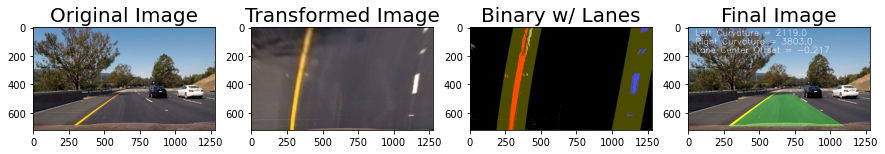

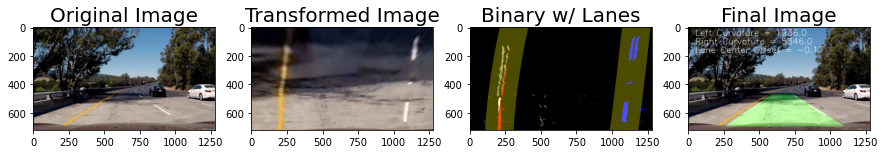

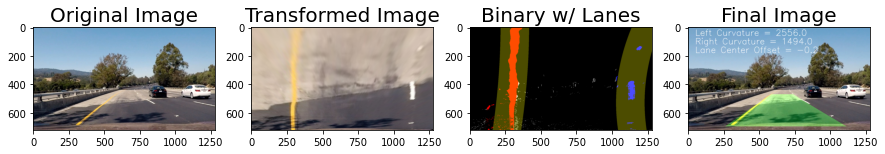

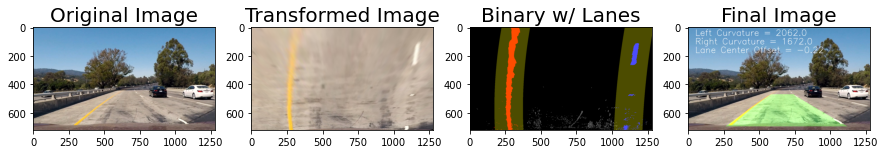

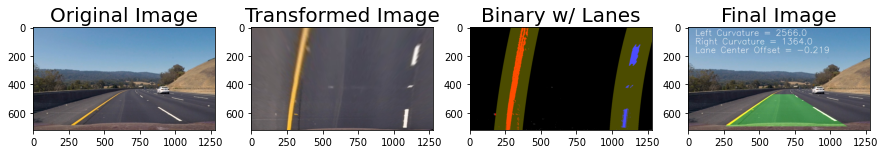

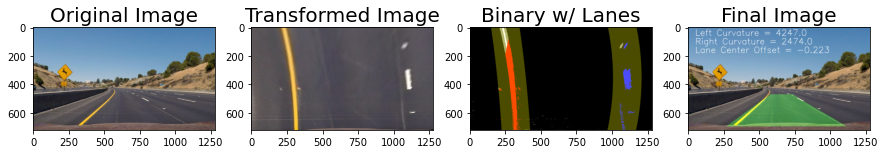

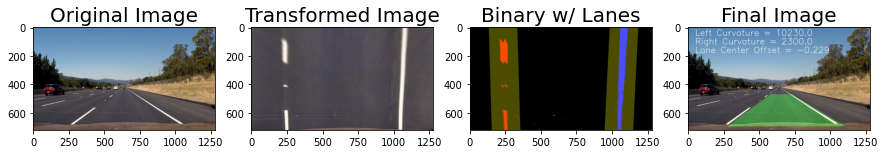

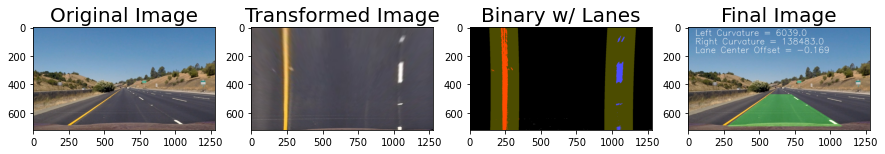

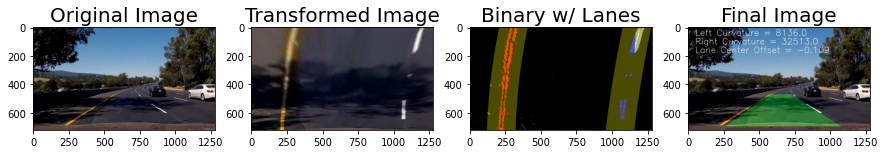

In [13]:
lane_images = glob.glob('test_images/*.jpg')
output_dir = 'output_images'
image_ct = len(lane_images)
for image in lane_images:
    filename = image.split('.')[0]#.split['/'][1]
    filename = filename.split('/')[1]
    extension = image.split('.')[1]
    print(image)
    demo_img = plt.imread(image)
    lf.process_image(demo_img)
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,7))
    ax1.imshow(demo_img)
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(lf.top_down)
    ax2.set_title('Transformed Image', fontsize=20)
    ax3.imshow(lf.binary_lines)
    ax3.set_title('Binary w/ Lanes', fontsize=20)
    ax4.imshow(lf.annotated)
    ax4.set_title('Final Image', fontsize=20)
    #lf.reset_lines()
    plt.imsave('output_images/' + filename + '_processed.' + extension, lf.annotated)
    #plt.imsave('examples/final.jpg', final_img2)
    #f.savefig('examples/transformation_comparison.jpg')
    #plt.imsave('examples/poly_margin_fit.jpg',debug_line2)
    
    

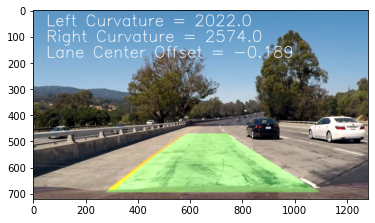

In [11]:
test_image = plt.imread('test_images/test1.jpg')
out = lf.process_image(test_image)
plt.imshow(out)
#plt.imsave('examples/binary_example.jpg', binary_example)

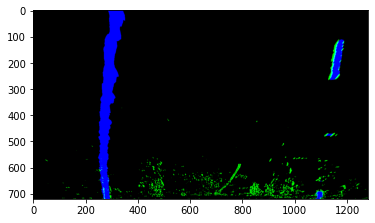

In [12]:
plt.imshow(lf.binary)

# Process Video

In [14]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [5]:
cal_images = glob.glob('camera_cal/calibration*.jpg')
lf_video = LaneFinder(cal_images)

In [8]:
output_vid = 'project_video_output.mp4'
input_vid = 'project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip(input_vid)
white_clip = clip1.fl_image(lf_video.process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output_vid, audio=False)
clip1.close()

t:   0%|          | 2/1260 [00:00<01:25, 14.77it/s, now=None]

Moviepy - Building video project_video_output.mp4.
Moviepy - Writing video project_video_output.mp4



Moviepy - Done !
Moviepy - video ready project_video_output.mp4
CPU times: user 6min 12s, sys: 57.6 s, total: 7min 10s
Wall time: 3min 30s


In [9]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_vid))

## Debug Video Portion

In [62]:
debug_fname = 'debug_video1.mp4'
input_vid = 'project_video.mp4'
#debugclip1 = VideoFileClip(input_vid).subclip(38, 43)
#debugclip1.write_videofile(debug_fname, audio=False)
#debugclip1.close()

In [63]:
cap = cv2.VideoCapture(debug_fname)
frame_count = 0

#### repeat this frame until we begin to see issues with the lane find

15
poly lane find


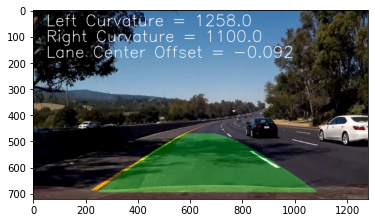

In [78]:
if cap.isOpened():
    for i in range(1):
        if cap.isOpened():
            ret, frame = cap.read()
    ret, frame = cap.read()
    if ret:
        frame_count += 1
        print(frame_count)
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(lf_video.process_image(img))
        #plt.show()
else:
    print('closing')
    cap.release()

#### Debug the output/save the file for further analysis in the examples.ipynb notebook

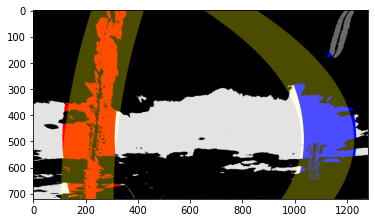

In [82]:
plt.imshow(lf_video.binary_lines)
plt.imsave('test_images/shadow1.jpg',img)

In [61]:
cap.release()

# Challenge Video

In [15]:
cal_images = glob.glob('camera_cal/calibration*.jpg')
lf_video_challenge = LaneFinder(cal_images)
output_vid = 'challenge_video_output.mp4'
input_vid = 'challenge_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip(input_vid)
white_clip = clip1.fl_image(lf_video_challenge.process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output_vid, audio=False)
clip1.close()

t:   0%|          | 2/485 [00:00<00:31, 15.49it/s, now=None]

starting lane find
Moviepy - Building video challenge_video_output.mp4.
Moviepy - Writing video challenge_video_output.mp4



Moviepy - Done !
Moviepy - video ready challenge_video_output.mp4
CPU times: user 2min, sys: 20.4 s, total: 2min 21s
Wall time: 1min 14s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_vid))